# Support Vector Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import NuSVR
from sklearn.model_selection import GridSearchCV, KFold

## Regression with the ν-SVR

### Load training and validation sets

In [2]:
train = pd.read_csv('TrainingRidge.csv')
print (train.head())
trainX = np.array(train[['x1', 'x2']])
trainY = np.array(train['obs'])
val = pd.read_csv('ValidationRidge.csv')
print (val.head())
valX = np.array(val[['x1', 'x2']])
valY = np.array(val['dens'])

    x1   x2  obs
0  140  116   10
1  198   88   14
2  174  112    2
3  168   52   32
4  206   44   10
    x1  x2       dens
0  140  40  10.447548
1  142  40  10.678885
2  144  40  10.987773
3  146  40  11.378550
4  148  40  11.845408


### Train the ν-SVR on the training set with the standard parameters of your library (“out of the box”). Plot the model prediction for the validation set as an image plot. Compute the total mean squared error (MSE) between model prediction and true labels of the validation set.

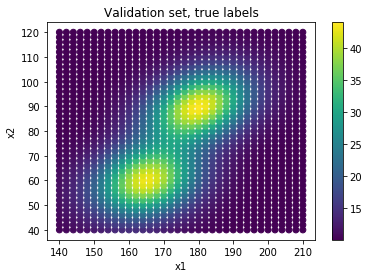

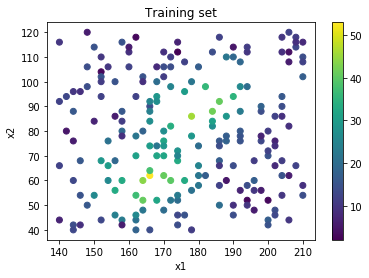

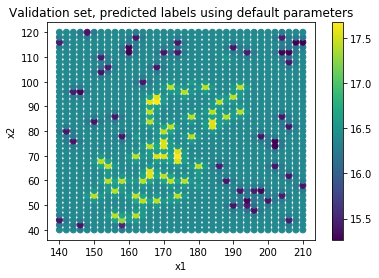

MSE = 76.7912781083782


In [3]:
clf = NuSVR()
clf.fit(trainX, trainY)
prediction = clf.predict(valX)

plt.figure()
plt.scatter(valX[:, 0], valX[:, 1], c = valY)
plt.xlabel('x1'); plt.ylabel('x2'); plt.colorbar(); plt.title('Validation set, true labels'); plt.show()
plt.figure()
plt.scatter(trainX[:, 0], trainX[:, 1], c = trainY)
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Training set'); plt.colorbar(); plt.show()
plt.figure()
plt.scatter(valX[:, 0], valX[:, 1], c = prediction)
plt.xlabel('x1'); plt.ylabel('x2'); plt.colorbar()
plt.title('Validation set, predicted labels using default parameters'); plt.show()

mse = np.sum((valY - prediction)**2)/valY.shape[0]
print ('MSE = {}'.format(mse))

### Perform a 10-fold nested cross-validation with a ν-SVR and parameters ν = 0.5 andC ∈ 2i, i ∈ {−2,...,12}. UseaGaussianRBFkernelwithγ ∈ 2j, j ∈ {−12,...,0}. 

In [4]:
# nested CV
param_grid = {'C': 2.**np.arange(-2, 13), 'gamma': 2.**np.arange(-12, 1)}
kf = KFold(n_splits=10)
KFold(n_splits=10, random_state=None, shuffle=False)
MSE = []
best_params = {}
min_mse = 10000
for train_index, test_index in kf.split(trainX):
    clf = GridSearchCV(NuSVR(nu=0.5), param_grid, cv=10)
    clf.fit(trainX[train_index], trainY[train_index])
    prediction = clf.predict(trainX[test_index])
    params = clf.best_params_
    mse = np.sum((trainY[test_index] - prediction)**2)/trainY[test_index].shape[0]
    MSE.append(mse)
    print ('MSE: {}'.format(mse))
    print ('parameters: {} '.format(params))
    print ('--------------------------------------------------------------')
    if mse < min_mse:
        best_params = params
        min_mse = mse

print ('Best parameters: {}'.format(best_params))
print ('MSE: {}'.format(min_mse))

MSE: 18.833778309250384
parameters: {'C': 16.0, 'gamma': 0.0078125} 
--------------------------------------------------------------
MSE: 17.71726705546171
parameters: {'C': 16.0, 'gamma': 0.00390625} 
--------------------------------------------------------------
MSE: 18.120923335792828
parameters: {'C': 32.0, 'gamma': 0.00390625} 
--------------------------------------------------------------
MSE: 22.12353497605426
parameters: {'C': 16.0, 'gamma': 0.00390625} 
--------------------------------------------------------------
MSE: 7.603206240289696
parameters: {'C': 8.0, 'gamma': 0.00390625} 
--------------------------------------------------------------
MSE: 22.894506627816845
parameters: {'C': 16.0, 'gamma': 0.00390625} 
--------------------------------------------------------------
MSE: 20.524118084944718
parameters: {'C': 16.0, 'gamma': 0.00390625} 
--------------------------------------------------------------
MSE: 10.284859459842615
parameters: {'C': 16.0, 'gamma': 0.00390625} 
----

### Extract the best parameter combination C and γ. Train the entire training set with these parameters and plot the model prediction for the validation set as an image plot.

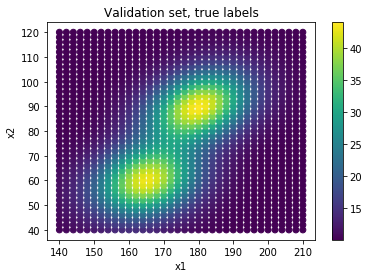

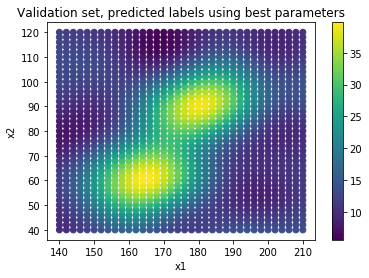

MSE = 3.0292726843951745


In [5]:
model = NuSVR(nu=0.5, C=best_params['C'], gamma=best_params['gamma'])
model.fit(trainX, trainY)
prediction = model.predict(valX)

plt.figure()
plt.scatter(valX[:, 0], valX[:, 1], c = valY)
plt.xlabel('x1'); plt.ylabel('x2'); plt.colorbar(); plt.title('Validation set, true labels'); plt.show()
plt.figure()
plt.scatter(valX[:, 0], valX[:, 1], c = prediction)
plt.xlabel('x1'); plt.ylabel('x2'); plt.colorbar()
plt.title('Validation set, predicted labels using best parameters'); plt.show()

mse = np.sum((valY - prediction)**2)/valY.shape[0]
print ('MSE = {}'.format(mse))